# Support Vector Regression (SVR)

Why use SVR?
* Polynomial regression is a special case of linear regression. Polynomial regression try to minimise therror rate, while SVR try to fit the error within a certain threshold.

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/MyDrive/MachineLearning/Part2_Regression/Section7_Support_Vector_Regression_(SVR)/Python

Mounted at /content/drive


## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]



## Feature Scaling

Why in this notebook we need feature scaling but in previous (`Polynimial Linear Regression` we don't)?
* The answer is the linear regression is solve by linear equation with coefficients to each independent variable, those coefficients were adjusted in a way that we didn't require feature scaling. But in this `SVR` we're trying to solve an implicit equation hence we need feature scaling.
* Feature scaling is usually used on the methods which are based on measures of how far apart data points, such as `SVM` or `KNN`

Why we apply `Feature Scaling` on both `X` (features) and `y`?
* In this case, we have `Position level` (feature) range from `1->10` but the `Salary` (dependent variable, range from `45000->1000000`) is much higher than the feature, so maybe it will be neglected by the model.

In nutshell: 
When dependent variable takes super high values with respect to other features->apply feature sclaling, put all features and dependent variable in the same range.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_Y = StandardScaler()
y = sc_Y.fit_transform(y)


# although we can use only one StandardScaler object but seperate for easy to reuse

In [ ]:
np.concatenate((X, y), axis=1)

array([[-1.5666989 , -0.72004253],
       [-1.21854359, -0.70243757],
       [-0.87038828, -0.66722767],
       [-0.52223297, -0.59680786],
       [-0.17407766, -0.49117815],
       [ 0.17407766, -0.35033854],
       [ 0.52223297, -0.17428902],
       [ 0.87038828,  0.17781001],
       [ 1.21854359,  0.88200808],
       [ 1.5666989 ,  2.64250325]])

## Training the SVR model on the whole dataset

We'll use: [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)

Kernels: https://data-flair.training/blogs/svm-kernel-functions/

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [ ]:
scaled_x = sc_X.transform([[6.5]])
scaled_pred = regressor.predict(scaled_x)
# Revesere back to original scaling to get the results
sc_Y.inverse_transform(scaled_pred)

array([170370.0204065])

## Visualising the SVR results

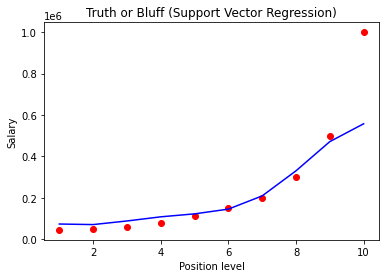

In [ ]:
# scaled_x = sc_X.transform(X)
scaled_pred = regressor.predict(X)
# Revesere back to original scaling to get the results
rescaled_y = sc_Y.inverse_transform(scaled_pred)

plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color="r", label="Train data")
plt.plot(sc_X.inverse_transform(X), rescaled_y, color="b", label="SVR")
plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

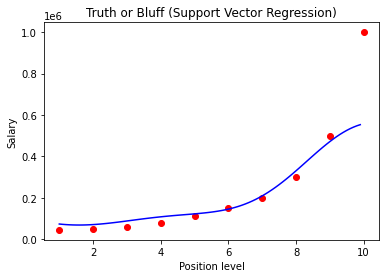

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)

scaled_x = sc_X.transform(X_grid)
scaled_pred = regressor.predict(scaled_x)
# Revesere back to original scaling to get the results
rescaled_y = sc_Y.inverse_transform(scaled_pred)

plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color="r", label="Train data")
plt.plot(X_grid, rescaled_y, color="b", label="SVR")
plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()